# CS412 - Machine Learninig - 2022-2023
## Homework 4 - 100 pts


## Goal

The goal of this homework is two-fold:

*   Introduction to the Transfer Learning
*   Gain experience with three dimensional input data (colored images), and pretrained models (Part-A)

## Dataset
[**CelebA**](https://www.cs.toronto.edu/~kriz/cifar.html) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

**Download the data from Sucourse and upload it to your Google drive. In your Google drive, you need to have CelebA30k.zip and CelebA30k.csv uploaded. (Do not change the name of these files.) Reserve 10% of the training data for validation and %10 for test** and  **use the rest for development (learning your models). The test data (3000 samples) should only be used for testing at the end, and not model selection.**

## Task
Build a classifier with the Keras library function calls and pretrained models to *classify gender* in the CelebA dataset, completing the given code and without changing the network.


## Software: 

Keras is a library that we will use especially for deep learning, but also with basic neural network functionality of course. 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

https://keras.io/api/

https://keras.io/api/applications/

When you search for Conv2d for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Follow the submission/answer requirements in SuCourse. 

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   Make sure you change your runtime to GPU.

## 2) Load training dataset

*  Read from Keras library.

In [2]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from numpy import random
from PIL import Image

import keras
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.layers import Dropout
from keras.regularizers import l2
from keras.regularizers import l1
np.random.seed(5)
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import os
%matplotlib inline

In [4]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/celeba_30k.csv') # enter the file path on your drive for the csv file
data.head()

,image_id,Male,Blond_Hair,Eyeglasses,Wearing_Earrings,Bangs,Young,Smiling,Heavy_Makeup,Straight_Hair,Black_Hair
0,000001.jpg,0,0,0,1,0,1,1,1,1,0
1,000002.jpg,0,0,0,0,0,1,1,0,0,0
2,000003.jpg,1,0,0,0,0,1,0,0,0,0
3,000004.jpg,0,0,0,1,0,1,0,0,1,0
4,000005.jpg,0,0,0,0,0,1,0,1,0,0


In [5]:
gender_data = data[['image_id', 'Male']].copy()
gender_data.head()

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [6]:
#this will extract the contents of the zip file into a folder named data
#do not extract the zip into your google drive (i.e don't use drive/My Drive in the right path since it slows down the process)
#only change the left path

!unzip "/content/drive/My Drive/Colab Notebooks/celeba_30k.zip" -d "/content/data"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data/celeba_30k/003938.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._003938.jpg  
  inflating: /content/data/celeba_30k/025041.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._025041.jpg  
  inflating: /content/data/celeba_30k/005391.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._005391.jpg  
  inflating: /content/data/celeba_30k/012835.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._012835.jpg  
  inflating: /content/data/celeba_30k/023430.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._023430.jpg  
  inflating: /content/data/celeba_30k/020139.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._020139.jpg  
  inflating: /content/data/celeba_30k/017795.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._017795.jpg  
  inflating: /content/data/celeba_30k/006840.jpg  
  inflating: /content/data/__MACOSX/celeba_30k/._006840.jpg  
  inflating: /content/data/celeba_30k/007586.jpg 

In [7]:
first_image_path = os.path.join("/content/data/celeba_30k/", gender_data.loc[0,"image_id"])
img = Image.open(first_image_path) 

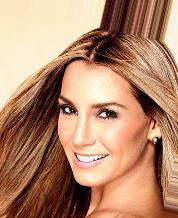

In [8]:
img

##3) Visualizing/Understanding the dataset

- Display five random images together with their labels

- Display statistics about the dataset, such as distribution of labels, etc.


image_id            000747.jpg
Male                         1
Blond_Hair                   0
Eyeglasses                   0
Wearing_Earrings             0
Bangs                        0
Young                        0
Smiling                      0
Heavy_Makeup                 0
Straight_Hair                0
Black_Hair                   0
Name: 746, dtype: object


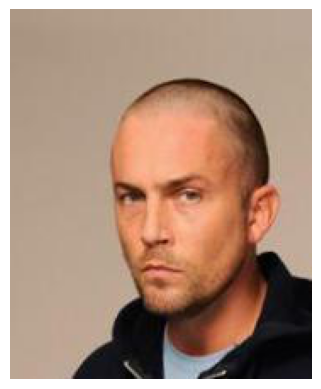

image_id            019910.jpg
Male                         0
Blond_Hair                   0
Eyeglasses                   0
Wearing_Earrings             0
Bangs                        0
Young                        1
Smiling                      1
Heavy_Makeup                 1
Straight_Hair                0
Black_Hair                   0
Name: 19909, dtype: object


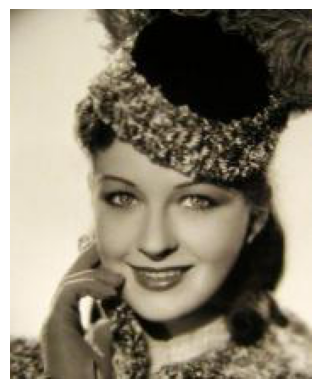

image_id            007266.jpg
Male                         0
Blond_Hair                   0
Eyeglasses                   0
Wearing_Earrings             0
Bangs                        0
Young                        1
Smiling                      1
Heavy_Makeup                 1
Straight_Hair                0
Black_Hair                   0
Name: 7265, dtype: object


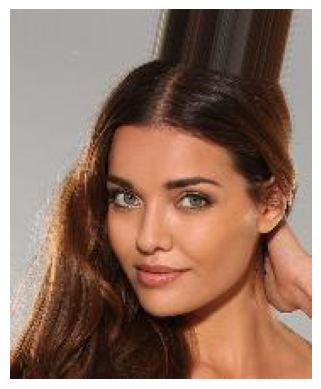

image_id            017506.jpg
Male                         1
Blond_Hair                   0
Eyeglasses                   0
Wearing_Earrings             0
Bangs                        0
Young                        1
Smiling                      0
Heavy_Makeup                 0
Straight_Hair                1
Black_Hair                   0
Name: 17505, dtype: object


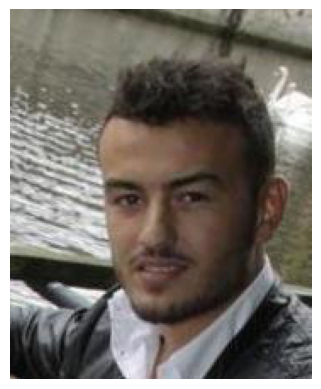

image_id            004740.jpg
Male                         1
Blond_Hair                   0
Eyeglasses                   0
Wearing_Earrings             0
Bangs                        0
Young                        1
Smiling                      0
Heavy_Makeup                 0
Straight_Hair                0
Black_Hair                   0
Name: 4739, dtype: object


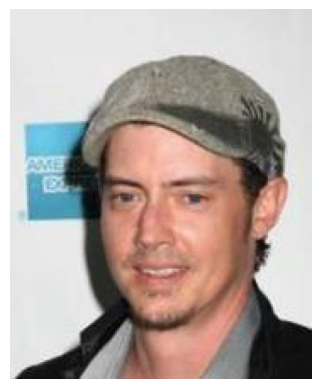

In [9]:
# plot random 5 images in your dataset with their labels
import random
random_numbers = random.sample(range(30001), 5)


for i in random_numbers:
  
  image_path = os.path.join("/content/data/celeba_30k/", data.loc[i,"image_id"])
  img = Image.open(image_path) 
 
  selected_row = data.iloc[i]
  print(selected_row)
  plt.imshow(img)
  plt.axis('off')  # Remove the axis labels
  plt.show()



##4) Split the dataset as train (also called development) (80%) and validation (10%) and test (10%) set. You'll tune the hyperparameters using the validation set and evaulate the model on the unseen test set. 

In [9]:
gender_data["Male"] = gender_data["Male"].replace({0: 'Female', 1: 'Male'}) 
gender_data.head()

,image_id,Male
0,000001.jpg,Female
1,000002.jpg,Female
2,000003.jpg,Male
3,000004.jpg,Female
4,000005.jpg,Female


In [10]:
# Split 80-10-10
from sklearn.model_selection import train_test_split 
train_df, val_df = train_test_split(gender_data, test_size=0.1, random_state=42, shuffle = True)
train_df, test_df = train_test_split(train_df, test_size=1/9, random_state=42, shuffle = True) #since 0.9 * (1/9) = 0.1
train_df.head

<bound method NDFrame.head of          image_id    Male
9208   009209.jpg    Male
9525   009526.jpg  Female
8326   008327.jpg  Female
21050  021051.jpg  Female
7729   007730.jpg    Male
...           ...     ...
3645   003646.jpg    Male
7686   007687.jpg  Female
4148   004149.jpg  Female
11219  011220.jpg  Female
11005  011006.jpg    Male

[24000 rows x 2 columns]>

In [11]:
data_path = "/content/data/celeba_30k" #where you extracted the zip file
total_train = train_df.shape[0]
total_validate = val_df.shape[0]
batch_size= 16

#create the test_generator accordingly
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, save_img
#from keras.preprocessing.image import ImageDataGenerator, load_img


train_datagen = ImageDataGenerator() #augmentations for training set... https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
print("Train Set:")
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    data_path, 
    x_col='image_id',
    y_col='Male',
    class_mode='categorical',
    target_size=(224,224), #this will resize the image, you can change the size
    batch_size=batch_size
)


print("Validation Set:")
val_datagen = ImageDataGenerator() #augmentations for validation set
val_generator = val_datagen.flow_from_dataframe(
    val_df, 
    data_path, 
    x_col='image_id',
    y_col='Male',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=batch_size
)

Train Set:
Found 24000 validated image filenames belonging to 2 classes.
Validation Set:
Found 3000 validated image filenames belonging to 2 classes.


##5) Transfer Learning with VGG-16

We will create the base model from the well-known VGG-16 model. This is pre-trained on ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes.

First, you need to pick which layer of VGG-16 you will use for feature extraction. The very last classification layer (called "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

You'll also load the pretrained weights from ImageNet by specifying weights='imagenet'. 


In [12]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', input_shape = (224,224,3), include_top=False)
base_model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

By setting the trainable attribute to False, we ensure that the original (ImageNet) weights of the model will remain constant.

Note that it is possible to adjust the number of trainable layers by modifying the for loop.

In [13]:
#By setting the trainable attribute to False, we ensure that the original (ImageNet) weights of the model will remain constant.

for layer in base_model.layers:
    layer.trainable = False

We need a binary classifier (Male/Female) which we will add manually on top of the pre-trained model. This layer is usually called "classification head". 


In [14]:
def gender_model(base_model, img_shape=(224, 224, 3)):
    # Create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=img_shape)
    
    # Forward pass to get the output of the last pooling layer
    X = base_model(inputs)
    
    # Flatten the output
    X = tf.keras.layers.Flatten()(X)
    
    # Define the new binary classification head
    X = tf.keras.layers.Dense(128, activation='relu')(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    X = tf.keras.layers.Dense(1, activation='sigmoid')(X)
    
    outputs = X
    model = tf.keras.Model(inputs, outputs)
    
    return model
model = gender_model(base_model, (224,224,3))

## 6-) Fine-Tuning the Model

Since our base model is trained on a different dataset (ImageNet), we still need to tune the hyperparameters. 
Tune learning rate (most important), number of epochs and batch size.
####DO NOT RUN THIS PART IT TAKES SO MUCH TIME 

In [15]:
import math
# Define the hyperparameters to tune
learning_rate = [0.1, 0.01, 0.001]
num_epochs = 10
batch_size = [8,16]


for i in range(3):
    for j in range(2):
        print(f"Results for learning_rate = {learning_rate[i]}, batch_size = {batch_size[j]}.")      
        # Compile the model with the desired optimizer and loss function
        real_learning_rate = learning_rate[i]
        real_batch_size = batch_size[j]
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=real_learning_rate),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=['accuracy'])

        # Train the model using the generators
        history = model.fit(train_generator, batch_size=real_batch_size,
                            epochs=num_epochs, validation_data=val_generator, workers=8)

Results for learning_rate = 0.1, batch_size = 8.
Epoch 1/10
1500/1500 [==============================] - 135s 83ms/step - loss: 175.6663 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.7670 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
1500/1500 [==============================] - 120s 80ms/step - loss: 1.0246 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.8273 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
1500/1500 [==============================] - 120s 80ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
1500/1500 [==============================] - 120s 80ms/step - loss: 0.6966 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
1500/1500 [==============================] - 127s 85ms/s

## 7) Train the Network with  Tuned Parameters
####DO NOT RUN THIS PART IT TAKES SO MUCH TIME 

Epoch 1/10
1500/1500 [==============================] - 128s 85ms/step - loss: 425.4896 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 2/10
1500/1500 [==============================] - 127s 85ms/step - loss: 1.6528 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 3/10
1500/1500 [==============================] - 120s 80ms/step - loss: 4.1141 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 0.7421 - accuracy: 0.5000
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.
1500/1500 [==============================] - 120s 80ms/step - loss: 0.7421 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 5/10
1500/1500 [==============================] - 119s 79ms/step - loss: 0.7342 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 6/10
1500/1500 [==============

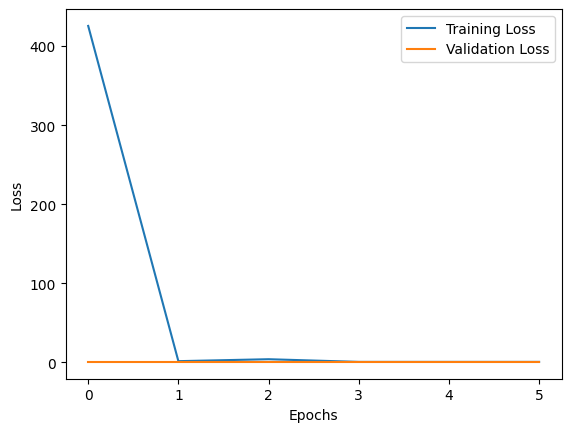

188/188 [==============================] - 13s 69ms/step - loss: 0.6931 - accuracy: 0.5000
Learning Rate: 0.1
Batch Size: 8
Training Loss: 4.028445243835449
Training Accuracy: 0.5
Validation Loss: 0.6931462287902832
Validation Accuracy: 0.5
Epoch 1/10
1500/1500 [==============================] - 129s 86ms/step - loss: 149.4791 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 2/10
1500/1500 [==============================] - 128s 85ms/step - loss: 1.8183 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 3/10
1500/1500 [==============================] - 120s 80ms/step - loss: 1.2317 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.5000
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.
1500/1500 [==============================] - 121s 81ms/step - loss: 0.6965 - accuracy: 0.5000 - val_loss

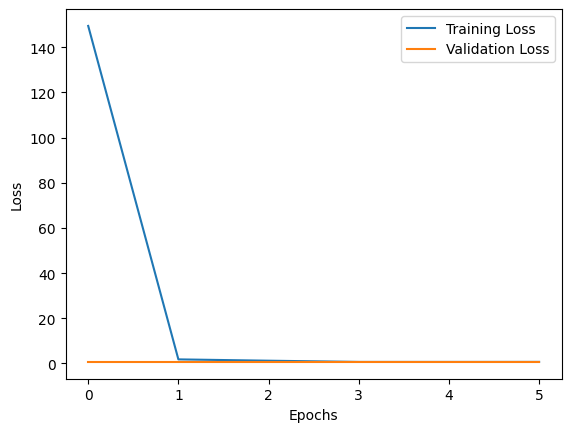

188/188 [==============================] - 13s 68ms/step - loss: 0.6931 - accuracy: 0.5000
Learning Rate: 0.1
Batch Size: 16
Training Loss: 0.8803211450576782
Training Accuracy: 0.5
Validation Loss: 0.6931462287902832
Validation Accuracy: 0.5
Epoch 1/10
1500/1500 [==============================] - 123s 81ms/step - loss: 1.9773 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.7009 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/10
1500/1500 [==============================] - 121s 80ms/step - loss: 0.6953 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 0.6987 - accuracy: 0.5000
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
1500/1500 [==============================] - 128s 85ms/step - loss: 0.6987 - accuracy: 0.5000 - val_los

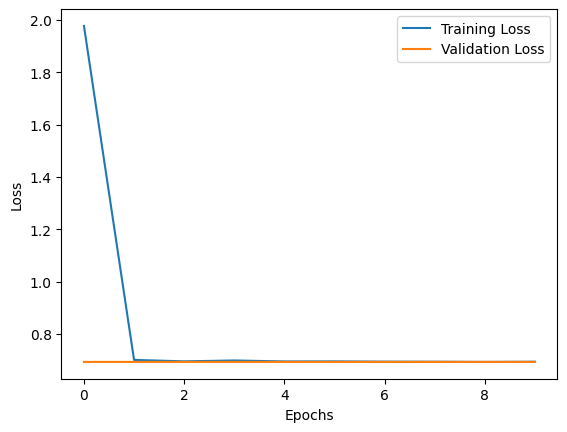

188/188 [==============================] - 13s 68ms/step - loss: 0.6931 - accuracy: 0.5000
Learning Rate: 0.01
Batch Size: 8
Training Loss: 0.6936236023902893
Training Accuracy: 0.5
Validation Loss: 0.6931482553482056
Validation Accuracy: 0.5
Epoch 1/10
1500/1500 [==============================] - 129s 86ms/step - loss: 1.5696 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/10
1500/1500 [==============================] - 121s 81ms/step - loss: 0.7049 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/10
1500/1500 [==============================] - 121s 80ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/10
1500/1500 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
1500/1500 [==============================] - 121s 81ms/step - loss: 0.6933 - accuracy: 0.5000 - val_los

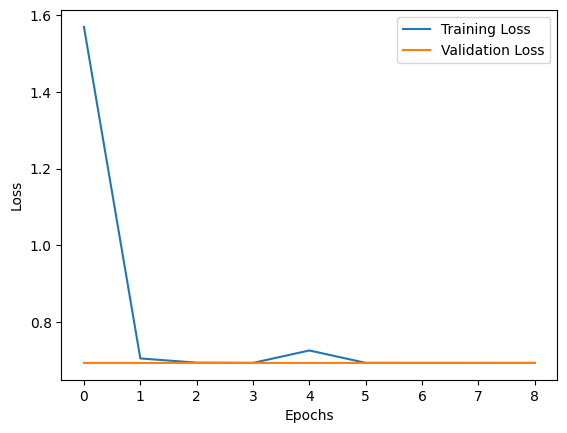

188/188 [==============================] - 13s 69ms/step - loss: 0.6931 - accuracy: 0.5000
Learning Rate: 0.01
Batch Size: 16
Training Loss: 0.7104302048683167
Training Accuracy: 0.5
Validation Loss: 0.6931462287902832
Validation Accuracy: 0.5
Epoch 1/10
1500/1500 [==============================] - 129s 86ms/step - loss: 0.7708 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.6982 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
1500/1500 [==============================] - 121s 81ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
1500/1500 [==============================] - 128s 85ms/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
1500/1500 [==============================] - 121s 81ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss:

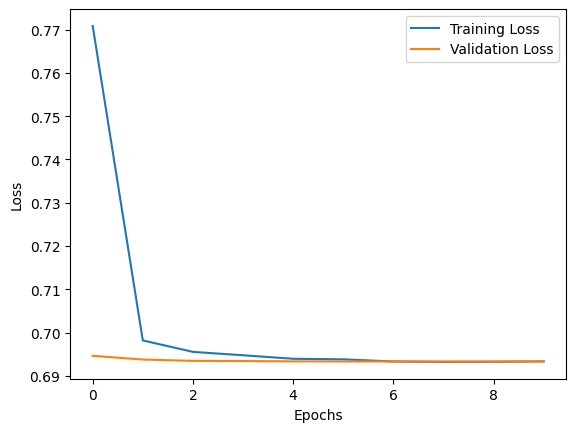

188/188 [==============================] - 13s 69ms/step - loss: 0.6933 - accuracy: 0.5000
Learning Rate: 0.001
Batch Size: 8
Training Loss: 0.6932324767112732
Training Accuracy: 0.5
Validation Loss: 0.6933494210243225
Validation Accuracy: 0.5
Epoch 1/10
1500/1500 [==============================] - 130s 86ms/step - loss: 0.7695 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
1500/1500 [==============================] - 128s 86ms/step - loss: 0.6969 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/10
1500/1500 [==============================] - 128s 86ms/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/10
1500/1500 [==============================] - 129s 86ms/step - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/10
1500/1500 [==============================] - 129s 86ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss:

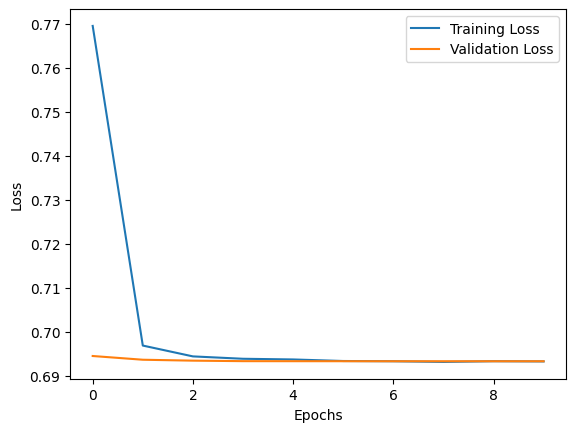

188/188 [==============================] - 13s 69ms/step - loss: 0.6933 - accuracy: 0.5000
Learning Rate: 0.001
Batch Size: 16
Training Loss: 0.6932074427604675
Training Accuracy: 0.5
Validation Loss: 0.6933464407920837
Validation Accuracy: 0.5


In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the hyperparameters for training
learning_rates = [0.1, 0.01, 0.001]
num_epochs = 10
batch_sizes = [8, 16]

# Define callbacks for early stopping and learning rate reduction on plateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        # Create a new instance of the model for each combination of hyperparameters
        model = gender_model(base_model, (224,224,3))
        
        # Compile the model with the desired optimizer and loss function
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['accuracy'])
        
        # Train the model using the generators and callbacks
        history = model.fit(train_generator, batch_size=batch_size, epochs=num_epochs,
                            validation_data=val_generator, workers=8,
                            callbacks=[early_stop, reduce_lr])
        
        # Plot training and validation loss
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Report the results
        train_loss, train_accuracy = model.evaluate(train_generator)
        val_loss, val_accuracy = model.evaluate(val_generator)
        
        print("Learning Rate:", learning_rate)
        print("Batch Size:", batch_size)
        print("Training Loss:", train_loss)
        print("Training Accuracy:", train_accuracy)
        print("Validation Loss:", val_loss)
        print("Validation Accuracy:", val_accuracy)


## 8) Test your classifier on Test set

- Predict the labels of testing data **using the best model that you have selected according to your validation results** and report the accuracy. 

In [17]:
from sklearn.metrics import accuracy_score
# Load test data





# Predict




# Report your result


# Load test data
test_generator = val_datagen.flow_from_dataframe(
    test_df, 
    data_path, 
    x_col='image_id',
    y_col='Male',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size
)

# Predict
y_true = test_generator.labels
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Report your result
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")






Found 3000 validated image filenames belonging to 2 classes.
188/188 [==============================] - 13s 68ms/step
Test Accuracy: 0.5853
